<a href="https://colab.research.google.com/github/nhanhd06/Hotel-Booking-Demand-Analyst/blob/master/various_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install missing package that is not Google Colab via pip
!pip install scprep tasklogger
!pip install umap-learn

     |████████████████████████████████| 104 kB 5.5 MB/s 
     |████████████████████████████████| 86 kB 3.1 MB/s 
     |████████████████████████████████| 1.1 MB 38.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=5d0b216afead36d11fcbeadb5f17649311a3719255300f7f3ae0aa936e5e5a09
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=c1e99f292cc1c7063c6768a0b290788e772bedbf26ed54e5328d65f59e3823ac
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [6]:
# import necessary packages
# Image Data Set - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html
# Tubular Data Set - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_olivetti_faces
from sklearn.datasets import load_wine
from sklearn.decomposition import TruncatedSVD 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
%matplotlib inline
import umap
import scprep

In [ ]:
# --PCA Method for Wine Data--

# Loading wine data and make data column and row
wine = load_wine()
df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


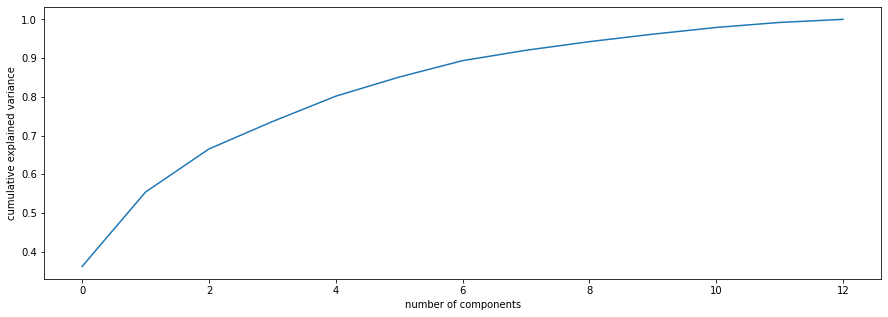

In [ ]:
# Intialized PCA with all 13 features components and showed percent of variance when number of components being reduced => Looks like 10 would be above 0.9 or 90%
scaled_data = StandardScaler().fit(df).transform(df)
pca = PCA(n_components = 13).fit(scaled_data)
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
# Since 10 is the most optimal component, intialized PCA again with 10 instead and output percent variance of 10 components for wine data => 96 %
pca = PCA(n_components = 10).fit(scaled_data)
x_pca = pca.transform(scaled_data)
percent = pca.explained_variance_ratio_
print("Retain percent of variance when number of components is 10 = %s " % ((np.round(sum(percent), decimals=5) * 100)))

Retain percent of variance when number of components is 10 = 96.17 


In [ ]:
# Output percent variance of 10 components for wine data => 96 %
percent = pca.explained_variance_ratio_
print("Retain percent of variance when number of components is 10 = %s " % ((np.round(sum(percent), decimals=5) * 100)))

Retain percent of variance when number of components is 10 = 96.17 


In [ ]:
# --PCA Method for Picture Set--

# Loading face data and output entire data shape with 400 components 
faces = fetch_olivetti_faces()
print(faces.images.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
(400, 64, 64)


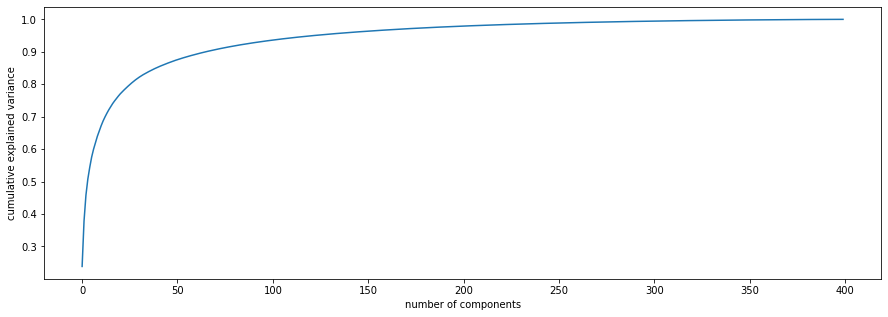

In [ ]:
# Intialized PCA with all 400 features components and showed percent of variance when number of components being reduced => Looks like 140 would be above 0.9 or 90%
pca = PCA(n_components=400, whiten=True)
pca.fit(faces.data)
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
# Since 140 is the most optimal component, intialized PCA again with 140 instead and output percent variance of 140 components for wine data => 95 %
pca = PCA(n_components=140).fit(faces.data)
components = pca.transform(faces.data)
reduce_result = pca.inverse_transform(components)
percent = pca.explained_variance_ratio_
print("Retain percent of 140 number of componenents = %s " % ((np.round(sum(percent), decimals=5) * 100)))

Retain percent of 140 number of componenents = 95.85900000000001 


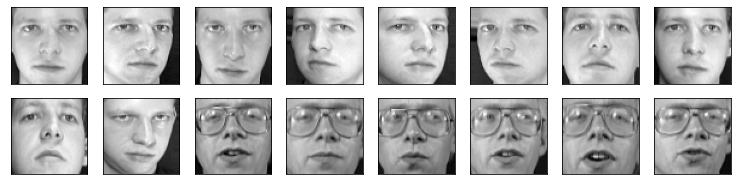

In [ ]:
# Output 16 pictures of original image set
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.20) 
for i in range(16):
  ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(faces.data[i].reshape(64, 64), cmap='binary_r')
plt.show()

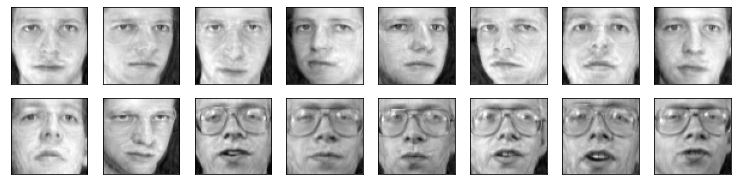

In [ ]:
# Output 16 pictures of already reduced image set
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.20) 
for i in range(16):
  ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(reduce_result[i].reshape(64, 64), cmap='binary_r')
plt.show()

In [ ]:
# --SVD Method for Wine Data--

# Loading wine data along with data as rows and target as columns
wine = load_wine()
wine_data, wine_target = wine.data, wine.target
print(wine_data.shape, wine_target.shape)

(178, 13) (178,)


In [ ]:
# Applied SVD Method and output left singular, right singular vector and singular value
scaler = StandardScaler()
X_features = scaler.fit_transform(wine_data)
U, S, V = np.linalg.svd(X_features, full_matrices=False)
print(U.shape, S.shape, V.shape)

(178, 13) (13,) (13, 13)


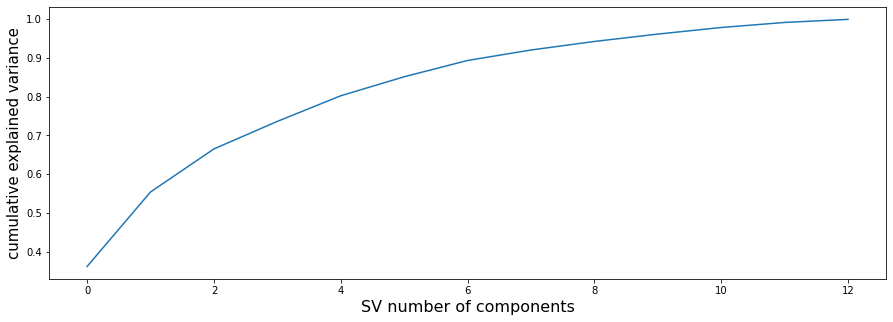

In [ ]:
# Showed percent of variance when number of components being reduced => Looks like 9 would be above 0.9 or 90%
svd_variance_ratio = np.round(S**2/np.sum(S**2), decimals=3)
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(svd_variance_ratio))
plt.xlabel('SV number of components', fontsize=16)
plt.ylabel('cumulative explained variance', fontsize=15);

In [ ]:
# Output the output values of each SV Number Of Components
labels = ['SV '+str(i) for i in range(1,13)]
svd_df = pd.DataFrame(U[:,1:13], index=wine_target.tolist(), columns=labels)
svd_df = svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV 1,SV 2,SV 3,SV 4,SV 5,SV 6,SV 7,SV 8,SV 9,SV 10,SV 11,SV 12
0,0,0.068468,-0.010330,0.016860,0.056236,0.020949,0.060223,-0.008271,-0.089452,0.152772,0.071229,0.098670,-0.015441
1,0,-0.015814,-0.126308,0.022781,-0.020907,0.086751,0.005430,-0.130067,0.043070,0.023897,0.022503,0.070834,0.000848
2,0,0.048911,0.061259,-0.056678,-0.020370,-0.051396,0.042833,0.043704,0.164254,0.016963,0.045219,0.000106,0.005063
3,0,0.130744,-0.010982,-0.044409,-0.025304,-0.010707,-0.038707,-0.081715,-0.007328,0.035825,-0.119816,-0.044156,-0.086133
4,0,0.041259,0.126323,0.032039,0.024218,0.038038,0.044839,-0.052907,-0.045576,-0.011726,0.082962,-0.039530,-0.018501


In [ ]:
# Output percent variance of 9 components for wine data => 96 %
all_percent = list(np.round(np.cumsum(svd_variance_ratio), decimals=5))
percent = all_percent.pop(9)
print("Retain percent of 9 number of componenents = %s " % (percent * 100))

Retain percent of 9 number of componenents = 96.1 


In [ ]:
# --SVD Method for Picture Set--

# Loading face data and applied SVD Method and output left singular, right singular vector and singular value
faces = fetch_olivetti_faces()
scaled_data = StandardScaler().fit_transform(faces.data)
U, S, V = np.linalg.svd(scaled_data, full_matrices=False)
print(U.shape, S.shape, V.shape)

(400, 400) (400,) (400, 4096)


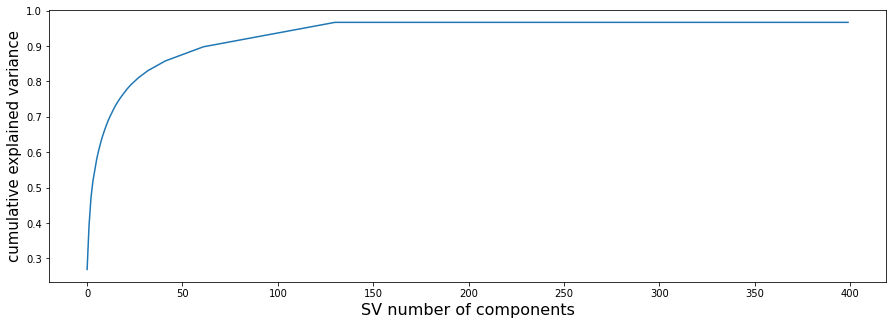

In [ ]:
# Showed percent of variance when number of components being reduced => Looks like 130 would be above 0.9 or 90%
svd_variance_ratio = np.round(S**2/np.sum(S**2), decimals=3)
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(svd_variance_ratio))
plt.xlabel('SV number of components', fontsize=16)
plt.ylabel('cumulative explained variance', fontsize=15);

In [ ]:
# Output the output values of each SV Number Of Components
faces_target = faces.target
labels = ['SV '+str(i) for i in range(130,141)]
svd_df = pd.DataFrame(U[:,130:141], index=faces_target.tolist(), columns=labels)
svd_df = svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV 130,SV 131,SV 132,SV 133,SV 134,SV 135,SV 136,SV 137,SV 138,SV 139,SV 140
0,0,-0.035507,0.049224,-0.060795,-0.110603,0.057108,0.002626,-0.014485,0.001544,0.065199,-0.024810,-0.032900
1,0,-0.047744,0.015763,-0.064936,0.080007,0.062691,0.013925,0.021127,-0.014382,-0.111332,0.042482,0.008723
2,0,-0.088439,0.051196,-0.019343,0.057679,-0.073349,-0.013243,-0.011813,0.074457,-0.054017,-0.031417,-0.080975
3,0,0.073023,-0.015081,0.093651,-0.054134,-0.069855,0.006536,0.052573,-0.003985,0.002003,0.028447,-0.070748
4,0,-0.033107,0.025616,-0.047952,-0.011035,-0.006891,0.052295,-0.028892,0.048416,0.004739,0.050427,0.033431


In [ ]:
# Output percent variance of 130 components for wine data => 96 %
all_percent = list(np.round(np.cumsum(svd_variance_ratio), decimals=5))
percent = all_percent.pop(130)
print("Retain percent of 140 number of componenents = %s " % (percent * 100))

Retain percent of 140 number of componenents = 96.70000076293945 


In [64]:
# --Locally Linear Embedding for Wine Data--

# Loading wine data and output wine_data and wine_target on how many rows and columns
wine = load_wine()
wine_data, wine_target = wine.data, wine.target
print(wine_data.shape, wine_target.shape)

(178, 13) (178,)


Text(0, 0.5, 'dimension 2')

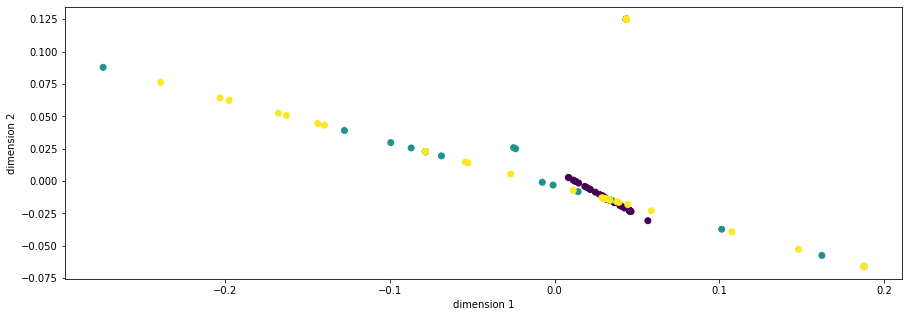

In [53]:
# Applied Locally Linear Embedding with two number of features and 10 of testing neighbor => Would work and retained the embedding data distance
lle = LocallyLinearEmbedding(n_components=10)
out = lle.fit_transform(wine['data'])
fig, ax = plt.subplots(figsize=(15,5))
plt.scatter(out[:, 0], out[:, 1], c=wine['target'])
ax.set_xlabel('dimension 1')
ax.set_ylabel('dimension 2')

In [13]:
scores = np.mean(out)
print(f"Accuracy: {np.mean(scores):.3f}")

Accuracy: 0.000


In [49]:
# --Locally Linear Embedding for Picture Data--

# Loading faces data and output faces_data and faces_target on how many rows and columns
faces = fetch_olivetti_faces()
faces_data, faces_target = faces.data, faces.target
print(faces_data.shape, faces_target.shape)

(400, 4096) (400,)


Text(0, 0.5, 'dimension 2')

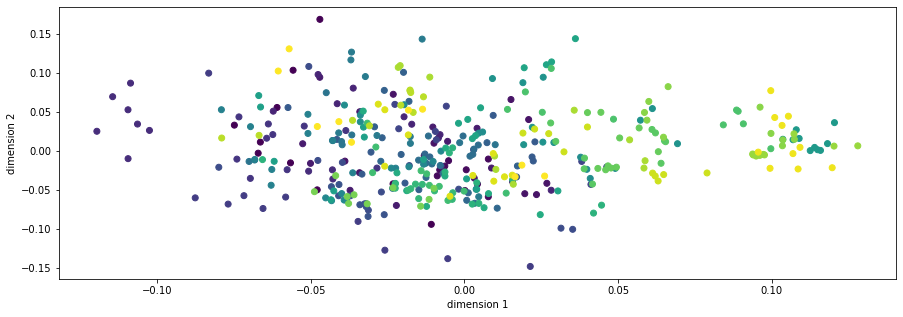

In [51]:
# Applied Locally Linear Embedding with only two number of coordinates and fifteen number of testing neighbor
lle = LocallyLinearEmbedding(n_neighbors=200, n_components=140, method='modified')
out = lle.fit_transform(faces['data'])
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(out[:, 0], out[:, 1], c=faces['target'])
ax.set_xlabel('dimension 1')
ax.set_ylabel('dimension 2')

In [55]:
# --t-SNE for wine data--

# Loading wine data and applied Scaler to scale data to unit variance
wine = load_wine()
wine_data, wine_target = wine.data, wine.target
df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
df = StandardScaler().fit_transform(df)

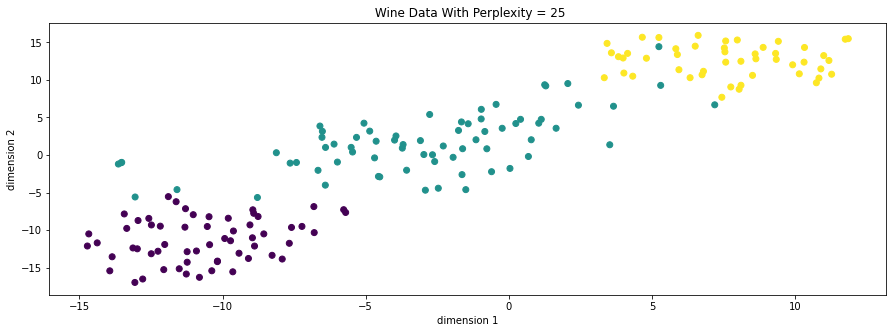

In [62]:
# Applied TSNE with perplexity = 25
tsne = TSNE(n_components=2, perplexity=25, random_state=0)
tsne_results = tsne.fit_transform(df)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize=(15,5))
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=wine.target)
plt.title(' Wine Data With Perplexity = 25')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.show()

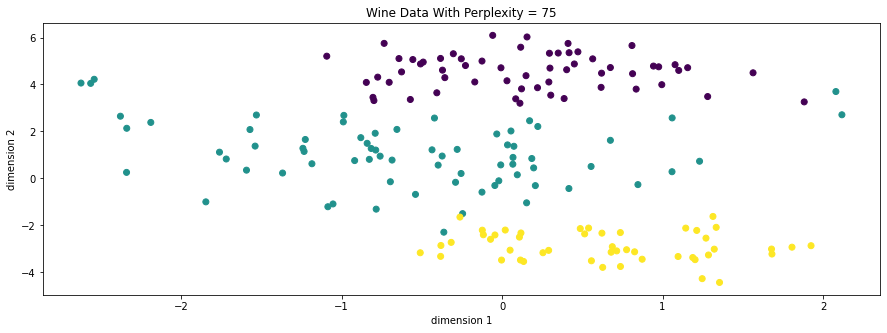

In [58]:
# Applied TSNE with perplexity = 75
tsne = TSNE(n_components=2, perplexity=75, random_state=0)
tsne_results = tsne.fit_transform(df)
tsne_results = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize=(15,5))
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=wine.target)
plt.title('Wine Data With Perplexity = 75')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.show()

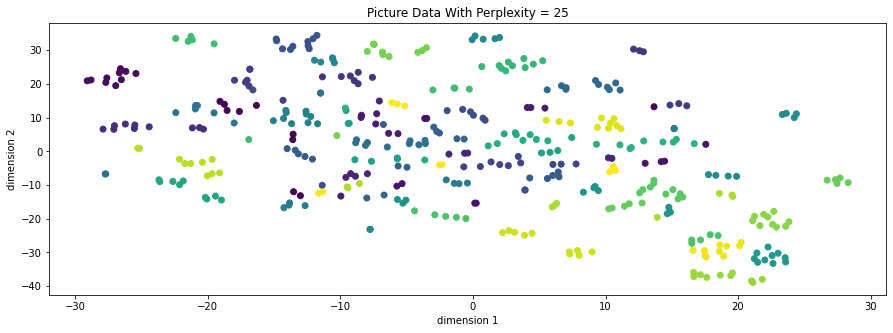

In [69]:
# --t-SNE for Picture Data--

# Loading faces data and applied TSNE with perplexity = 25
faces = fetch_olivetti_faces()
tsne = TSNE(n_components=2, perplexity=25, random_state=0)
tsne_results = tsne.fit_transform(faces['data'])
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize=(15,5))
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=faces.target)
plt.title('Picture Data With Perplexity = 25')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.show()

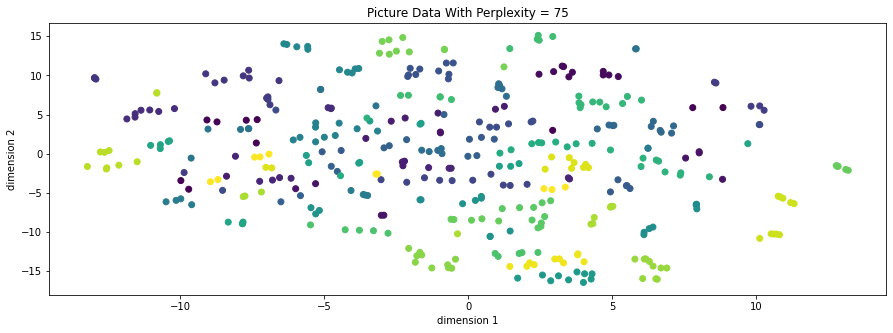

In [70]:
# Applied TSNE with perplexity = 75
tsne = TSNE(n_components=2, perplexity=75, random_state=0)
tsne_results = tsne.fit_transform(faces['data'])
tsne_results = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize=(15,5))
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=faces.target)
plt.title('Picture Data With Perplexity = 75')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.show()

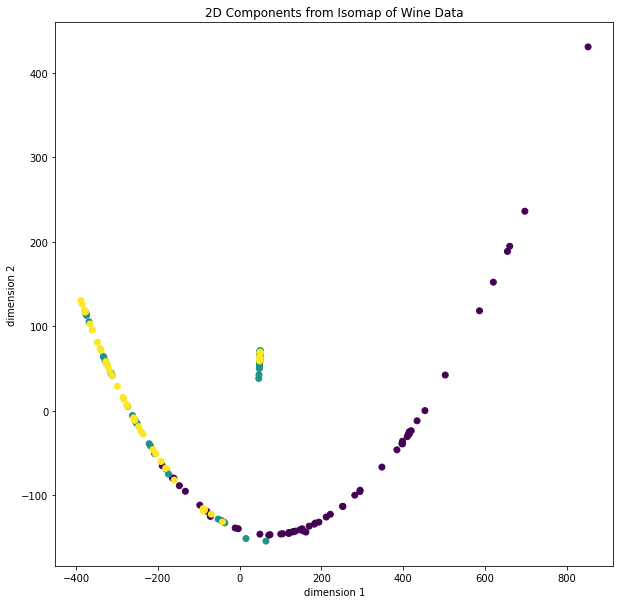

In [71]:
# --ISOMAP for wine data--

# Loading wine data and output wine_data, wine_target and apply ISOMAP with n components = 2
wine = load_wine()
wine_data, wine_target = wine.data, wine.target
isomap = Isomap(n_components=2)
isomap_result = isomap.fit_transform(wine_data)
isomap_result = pd.DataFrame(isomap_result, columns=['isomap1', 'isomap2'])
fig = plt.figure(figsize=(15,5))
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Wine Data')
ax.scatter(isomap_result['isomap1'], isomap_result['isomap2'], c=wine_target)
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.show()

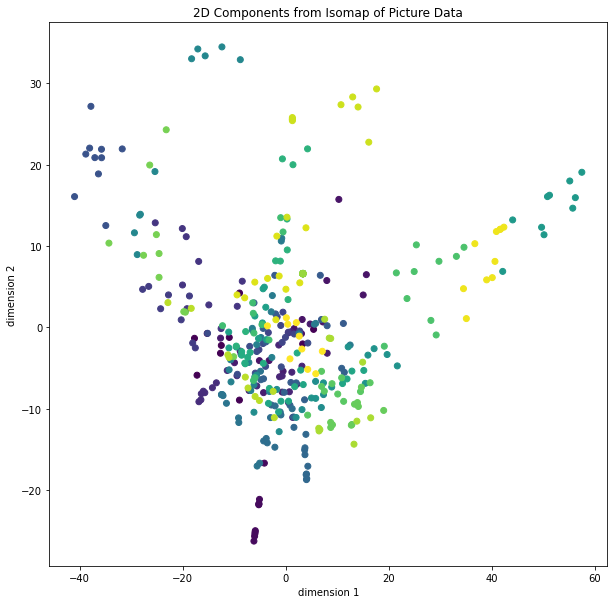

In [72]:
# --ISOMAP for Picture data--

# Loading faces data and apply ISOMAP with n components = 2
faces = fetch_olivetti_faces()
isomap = Isomap(n_components=2)
isomap_result = isomap.fit_transform(faces['data'])
isomap_result = pd.DataFrame(isomap_result, columns=['isomap1', 'isomap2'])
isomap_result.head()
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Picture Data')
ax.scatter(isomap_result['isomap1'], isomap_result['isomap2'], c=faces['target'])
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.show()

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


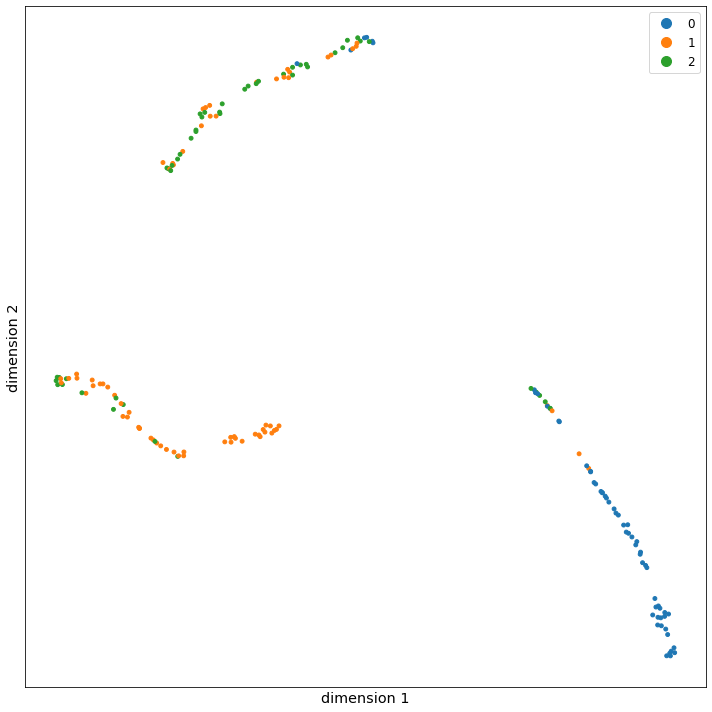

In [73]:
# --UMAP for wine data--

# Loading wine data and apply UMAP with default n components = 2
wine = load_wine()
wine_data, wine_target = wine.data, wine.target
umap_op = umap.UMAP()
umap_result = umap_op.fit_transform(wine_data)
umap_result = pd.DataFrame(umap_result, columns=['umap1', 'umap2'])
scprep.plot.scatter2d(umap_result, c=wine['target'], figsize=(10, 10), ticks=False, label_prefix='dimension ')

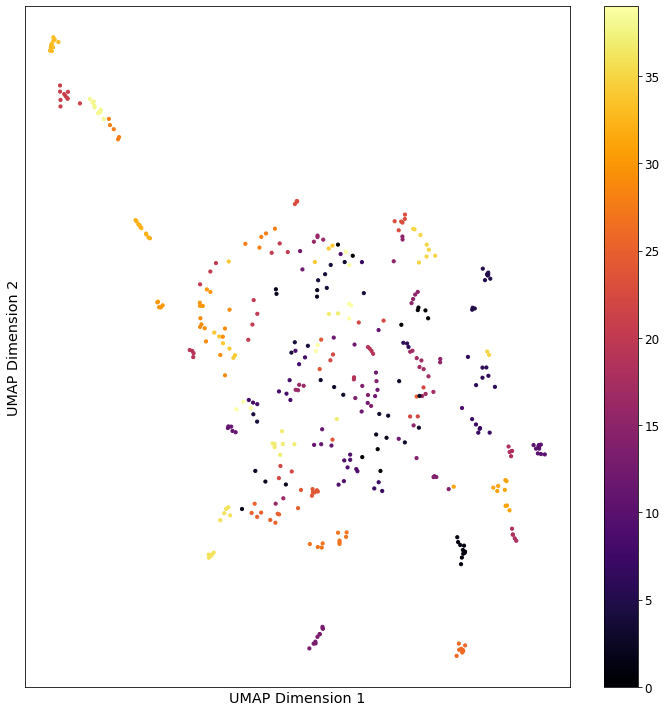

In [74]:
# --UMAP for Picture Data--

faces = fetch_olivetti_faces()
umap_op = umap.UMAP()
umap_result = umap_op.fit_transform(faces['data'])
umap_result = pd.DataFrame(umap_result, columns=['umap1', 'umap2'])
scprep.plot.scatter2d(umap_result, c=faces['target'], figsize=(10, 10), ticks=False, label_prefix='UMAP Dimension ')